<h1>kNN Nested Cross Validation</h1>
by: Afonso Proenca

Load libraries and dataset (iris dataset)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
mySeed=1234567
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data 
y=iris.target

Plot the data:

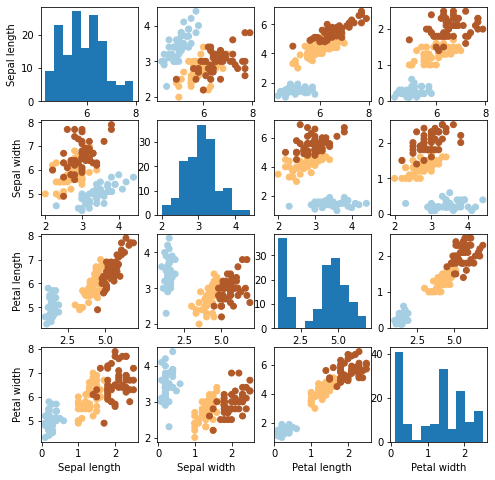

In [3]:
def myplotGrid(X,y):
    fig = plt.figure(figsize=(X.shape[1]*2,X.shape[1]*2))
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            ax = fig.add_subplot(X.shape[1],X.shape[1],(i+1)+(j*X.shape[1]))
            if(i == j):
                plt.hist(X[:,i])
            else:
                plt.scatter(X[:,j], X[:,i],c=y,cmap=plt.cm.Paired)
            if(j==3):
                if(i==0):
                    plt.xlabel('Sepal length')
                if(i==1):
                    plt.xlabel('Sepal width')
                if(i==2):
                    plt.xlabel('Petal length')
                if(i==3):
                    plt.xlabel('Petal width')
            if(i==0):
                if(j==0):
                    plt.ylabel('Sepal length')
                if(j==1):
                    plt.ylabel('Sepal width')
                if(j==2):
                    plt.ylabel('Petal length')
                if(j==3):
                    plt.ylabel('Petal width')    
            
myplotGrid(X,y)            

Add noise to data:

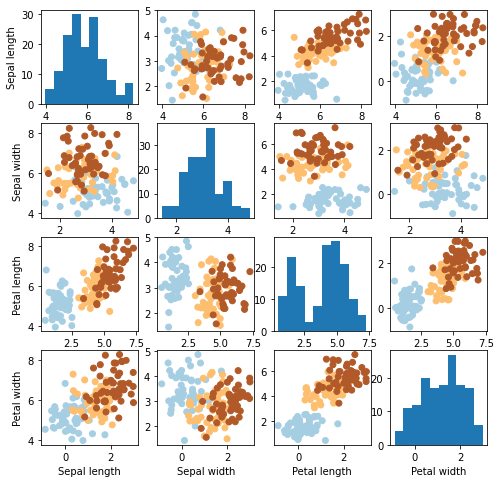

In [4]:
np.random.seed(mySeed)
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)

k-Nearest Neighbour Implementation:

In [5]:
def euclideanDistance(in1,in2):
    distance = np.sqrt(sum(np.square(in1 - in2)))
    return distance

def manhattanDistance(in1,in2):
    distance = sum(abs(in1 - in2))
    return distance

def mykNN(X,y,X_,nn,disType):
    y_pred = []
    for test in X_:
        index = np.zeros([len(X)])
        distances = np.zeros([len(X)])
        neighbours = np.zeros([len(X)])
        for train in range(len(X)):
            if disType == 'euclidean':
                distance = euclideanDistance(test,X[train])
            if disType == 'manhattan':
                distance = manhattanDistance(test,X[train])
            index[train] = train
            distances[train] = distance
            neighbours[train] = distance
        disIndex = []
        neighbours.sort()
        distances = distances.tolist()
        neighbours = neighbours.tolist()
        for k in range(nn):
            disIndex.append(distances.index(neighbours[k]))
        neighbours = index[disIndex]
        neighbours = list(map(int,neighbours))
        neighbours = y[neighbours]
        numClasses = max(y)
        votes = [0] * (numClasses+1)
        for k in neighbours:
            votes[k] += 1
        # if draw choose smallest
        classification = votes.index(max(votes))
        y_pred.append(classification)
    return y_pred

Nested Cross Validation:

In [6]:
def myConfMat(y_test,y_pred):
    C= np.zeros([max(y_test)+1,max(y_test)+1])
    for i in range(len(y_test)):
        C[y_test[i]][y_pred[i]] += 1;
    return C

def myNestedCrossVal(X,y,nFolds,nns,dists,mySeed):
    np.random.seed(mySeed)
    accuracy_fold=[]
    indices=np.random.permutation(y.size)
    bins= np.array_split(indices,nFolds)
    for i in range(0,nFolds):
        foldTrain=[]
        foldTest=[]
        foldVal=[]    
        foldPredict=[]
        foldTest.extend(bins[i])
        foldVal.extend(bins[(i+1)%nFolds])
        if (i+1)%nFolds == 0:
            foldTrain.extend(bins[((i+1)%nFolds)+1:i])
        else:
            foldTrain.extend(bins[:i] + bins[((i+1)%nFolds)+1:])
        foldTrain = [y for x in foldTrain for y in x]        
        print('Fold',i+1,'Train', len(foldTrain),'Val',len(foldVal),'Test',len(foldTest))
        bestDistance=''
        bestNN=-1
        bestAccuracy=-10
        for disType in dists:
            for nn in nns:
                y_pred = mykNN(X[foldTrain],y[foldTrain],X[foldVal],nn,disType)
                accuracy = np.where(y[foldVal]==y_pred)[0].size/y[foldVal].size
                print("Fold",i+1,"k",nn,"Distance",disType,"accuracy",accuracy)
                if(accuracy > bestAccuracy):
                    bestDistance = disType
                    bestNN = nn
                    bestAccuracy = accuracy
        print('Fold',i+1,'best k', bestNN, 'best Dist', bestDistance,'best Accuracy',bestAccuracy)
        foldTrain.extend(foldVal)
        y_pred = mykNN(X[foldTrain],y[foldTrain],X[foldTest],bestNN,bestDistance)
        accuracy = np.where(y[foldTest]==y_pred)[0].size/y[foldTest].size
        confMatrix = myConfMat(y[foldTest],y_pred)
        print("Confusion Matrix / Fold:",i+1, 'k:', bestNN, 'distance:', bestDistance, 'accuracy:', accuracy)
        print(confMatrix)
        accuracy_fold.append(accuracy)
    return accuracy_fold;

print("X")
accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
total = sum(accuracy_fold)/len(accuracy_fold)
print()
print("Accuracy per Fold X",accuracy_fold)
print("Accuracy Total X", total)
print()
print("---------------------------------------------------//---------------------------------------------")
print()
print("XN")
accuracy_fold=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
total = sum(accuracy_fold)/len(accuracy_fold)
print()
print("Accuracy per Fold XN",accuracy_fold)
print("Accuracy Total XN", total)

X
Fold 1 Train 90 Val 30 Test 30
Fold 1 k 1 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 2 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 3 Distance euclidean accuracy 0.9666666666666667
Fold 1 k 4 Distance euclidean accuracy 0.9666666666666667
Fold 1 k 5 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 6 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 7 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 8 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 9 Distance euclidean accuracy 0.9333333333333333
Fold 1 k 10 Distance euclidean accuracy 0.9666666666666667
Fold 1 k 1 Distance manhattan accuracy 0.9333333333333333
Fold 1 k 2 Distance manhattan accuracy 0.9
Fold 1 k 3 Distance manhattan accuracy 0.9666666666666667
Fold 1 k 4 Distance manhattan accuracy 0.9333333333333333
Fold 1 k 5 Distance manhattan accuracy 0.9333333333333333
Fold 1 k 6 Distance manhattan accuracy 0.9333333333333333
Fold 1 k 7 Distance manhattan accuracy 0.933333333333

Fold 3 k 8 Distance euclidean accuracy 0.9666666666666667
Fold 3 k 9 Distance euclidean accuracy 0.9666666666666667
Fold 3 k 10 Distance euclidean accuracy 0.9666666666666667
Fold 3 k 1 Distance manhattan accuracy 0.9
Fold 3 k 2 Distance manhattan accuracy 0.9666666666666667
Fold 3 k 3 Distance manhattan accuracy 0.9333333333333333
Fold 3 k 4 Distance manhattan accuracy 0.9333333333333333
Fold 3 k 5 Distance manhattan accuracy 0.9666666666666667
Fold 3 k 6 Distance manhattan accuracy 0.9333333333333333
Fold 3 k 7 Distance manhattan accuracy 0.9333333333333333
Fold 3 k 8 Distance manhattan accuracy 0.9666666666666667
Fold 3 k 9 Distance manhattan accuracy 0.9666666666666667
Fold 3 k 10 Distance manhattan accuracy 0.9666666666666667
Fold 3 best k 2 best Dist euclidean best Accuracy 1.0
Confusion Matrix / Fold: 3 k: 2 distance: euclidean accuracy: 0.8
[[ 5.  0.  0.]
 [ 0. 11.  3.]
 [ 0.  3.  8.]]
Fold 4 Train 90 Val 30 Test 30
Fold 4 k 1 Distance euclidean accuracy 0.7333333333333333
Fold